In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [3]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)

In [4]:
df = df[df['NewDateTime']>= '2021-03-01'].copy()
len(df)

7623

In [5]:
df = df.drop_duplicates(subset=['NewDateTime'], keep="last")

In [6]:
viewdata = 168*4
viewdata

672

In [7]:
data_training = df.iloc[0:int(len(df)-viewdata),:]
data_test = df.iloc[int(len(df)-viewdata):int(len(df)),:]

data_training

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
12677,46217.19,45134.11,46571.30,44950.53,4899.574833,2021-03-01 00:00:00,1.023962,0.023679,1.015226,0.0377,89
12678,46161.83,46217.18,46492.33,45850.00,2685.386005,2021-03-01 01:00:00,0.998802,-0.001199,1.015226,0.0377,82
12679,46419.56,46166.16,46796.94,46102.84,2926.951099,2021-03-01 02:00:00,1.005583,0.005568,1.015226,0.0377,82
12680,46336.37,46414.70,46540.31,46204.08,1970.348912,2021-03-01 03:00:00,0.998208,-0.001794,1.015226,0.0377,80
12681,46458.33,46336.38,46688.13,45959.70,2152.379904,2021-03-01 04:00:00,1.002632,0.002629,1.015226,0.0377,82
...,...,...,...,...,...,...,...,...,...,...,...
19596,46859.40,46646.68,47074.44,46631.84,1102.350180,2021-12-14 19:00:00,1.004560,0.004550,1.000387,0.0100,43
19597,47785.20,46859.42,47900.00,46839.78,2355.650860,2021-12-14 20:00:00,1.019757,0.019564,1.000387,0.0100,41
19598,48283.50,47786.13,48700.41,47746.19,2992.570450,2021-12-14 21:00:00,1.010428,0.010374,1.000387,0.0100,77
19599,48268.00,48283.49,48468.18,48000.00,1117.847940,2021-12-14 22:00:00,0.999679,-0.000321,1.000387,0.0100,79


In [8]:
data_test

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
19601,48136.92,48336.95,48761.00,48067.04,1962.15338,2021-12-15 00:00:00,0.995731,-0.004278,1.000075,0.0088,45
19602,48073.46,48136.93,48180.58,47901.00,1235.00149,2021-12-15 01:00:00,0.998682,-0.001319,1.000075,0.0088,45
19603,47997.58,48073.47,48095.45,47836.00,970.64786,2021-12-15 02:00:00,0.998422,-0.001580,1.000075,0.0088,46
19604,48262.41,47997.57,48299.99,47899.95,957.58234,2021-12-15 03:00:00,1.005518,0.005502,1.000075,0.0088,47
19605,48244.14,48262.40,48444.18,48075.77,1742.55070,2021-12-15 04:00:00,0.999621,-0.000379,1.000075,0.0088,60
...,...,...,...,...,...,...,...,...,...,...,...
20295,42972.05,42754.99,43086.70,42595.68,1440.44569,2022-01-11 19:00:00,1.005077,0.005064,0.999457,0.0073,48
20296,42800.38,42972.04,43095.26,42692.19,1219.60178,2022-01-11 20:00:00,0.996005,-0.004003,0.999457,0.0073,46
20297,42659.20,42797.62,42823.69,42643.74,702.10380,2022-01-11 21:00:00,0.996701,-0.003304,0.999457,0.0073,45
20298,42713.13,42664.71,42776.14,42597.41,561.85993,2022-01-11 22:00:00,1.001264,0.001263,0.999457,0.0073,43


In [9]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
12677,46217.19,45134.11,46571.30,44950.53,4899.574833,1.023962,0.023679,1.015226,0.0377,89
12678,46161.83,46217.18,46492.33,45850.00,2685.386005,0.998802,-0.001199,1.015226,0.0377,82
12679,46419.56,46166.16,46796.94,46102.84,2926.951099,1.005583,0.005568,1.015226,0.0377,82
12680,46336.37,46414.70,46540.31,46204.08,1970.348912,0.998208,-0.001794,1.015226,0.0377,80
12681,46458.33,46336.38,46688.13,45959.70,2152.379904,1.002632,0.002629,1.015226,0.0377,82
...,...,...,...,...,...,...,...,...,...,...
19596,46859.40,46646.68,47074.44,46631.84,1102.350180,1.004560,0.004550,1.000387,0.0100,43
19597,47785.20,46859.42,47900.00,46839.78,2355.650860,1.019757,0.019564,1.000387,0.0100,41
19598,48283.50,47786.13,48700.41,47746.19,2992.570450,1.010428,0.010374,1.000387,0.0100,77
19599,48268.00,48283.49,48468.18,48000.00,1117.847940,0.999679,-0.000321,1.000387,0.0100,79


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

In [11]:
X_train = []
Y_train = []

In [12]:
training_data.shape

(6924, 10)

In [13]:
for i in range(336, training_data.shape[0],8):
    
    X_train.append(training_data[i-336:i-168])
    Y_train.append(training_data[i-168:i,0])

In [14]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
# def shuffle(X,Y):
#     np.random.seed(10)
#     randomList = np.arange(X.shape[0])
#     np.random.shuffle(randomList)
#     return X[randomList], Y[randomList]

In [16]:
# X_train, Y_train = shuffle(X_train,Y_train)

In [17]:
Y_train=Y_train.reshape(Y_train.shape[0],168,1)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [19]:
import tensorflow as tf
model = tf.keras.models.load_model('168_168_V4.h5')

In [20]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
fromTime = df.at[167,'NewDateTime']
print(str(fromTime))

2021-12-14 23:00:00


In [21]:
df = df.drop(['NewDateTime'], axis = 1)

In [22]:
inputs = scaler.transform(df)
inputs.shape

(840, 10)

In [23]:
df2 =df['close'].copy()
pScaler = MinMaxScaler()
pData = pScaler.fit_transform(df2.values.reshape(-1, 1))
pData.shape

(840, 1)

In [24]:
X_test = []
Y_test = []
P_test = []
H_test = []
R_test = []
for i in range(336, inputs.shape[0],168):
    H_test.append(inputs[i-252:i-84])
    R_test.append(inputs[i-84:i+84,0])
for i in range(336, inputs.shape[0]+1,168):
    X_test.append(inputs[i-336:i-168])
    Y_test.append(inputs[i-168:i,0])
for i in range(inputs.shape[0], inputs.shape[0]+1,168):
    P_test.append(inputs[i-168:i])

In [25]:
X_test, Y_test , P_test ,H_test ,R_test= np.array(X_test), np.array(Y_test), np.array(P_test), np.array(H_test), np.array(R_test)
X_test.shape, Y_test.shape , P_test.shape, H_test.shape,R_test.shape

((4, 168, 10), (4, 168), (1, 168, 10), (3, 168, 10), (3, 168))

In [26]:
P_test[0,167,0]

0.34243946520724877

In [27]:
Y_test = Y_test.reshape(-1, 1)
Y_test=pScaler.inverse_transform(Y_test)
Y_test.shape

(672, 1)

In [28]:
R_test = R_test.reshape(-1, 1)
R_test=pScaler.inverse_transform(R_test)
R_test.shape

(504, 1)

In [29]:
Y_pred = model.predict(X_test)
Y_pred.reshape(-1, 1)
Y_pred=pScaler.inverse_transform(Y_pred.reshape(-1, 1))

H_pred = model.predict(H_test)
H_pred.reshape(-1, 1)
H_pred=pScaler.inverse_transform(H_pred.reshape(-1, 1))


In [30]:
ans = sorted(Y_pred)
print(ans[0]),print(ans[167])

[42686.43]
[44863.82]


(None, None)

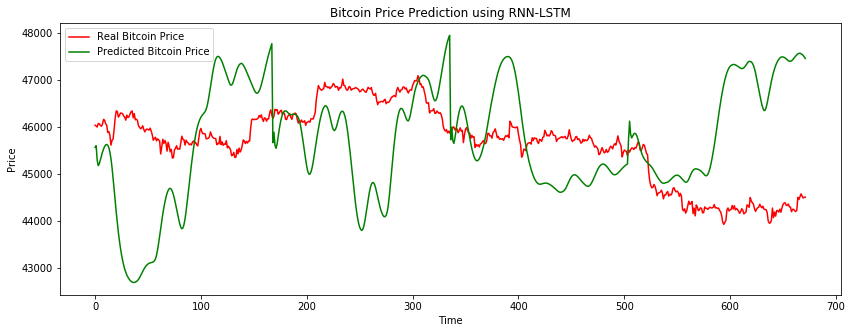

In [31]:
plt.figure(figsize=(14,5))
plt.plot(Y_test[:,0], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred[:,0], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

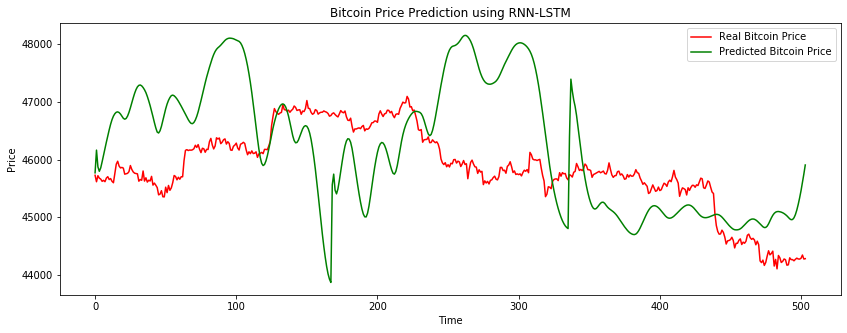

In [32]:
plt.figure(figsize=(14,5))
plt.plot(R_test[:,0], color = 'red', label = 'Real Bitcoin Price')
plt.plot(H_pred[:,0], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
ansPre = model.predict(P_test)
ansPre = pScaler.inverse_transform(ansPre.reshape(168,1))
ans = sorted(ansPre)
print(ans[0]),print(ans[167])

[44825.934]
[47588.953]


(None, None)

In [37]:
ansPre.shape

(168, 1)

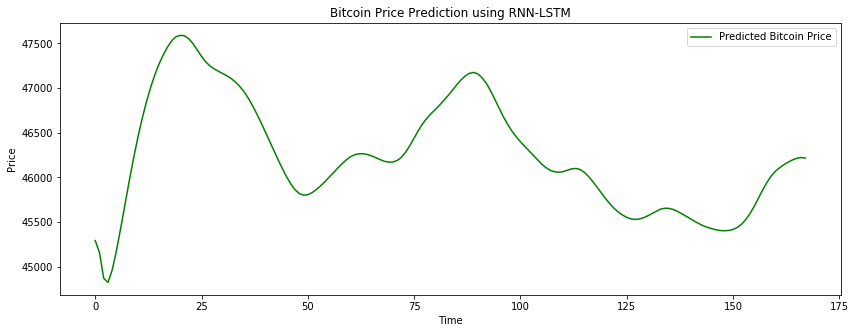

In [38]:
plt.figure(figsize=(14,5))
plt.plot(ansPre[:,0],  color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
print(str(fromTime)),print(ans[0]),print(ans[167])

2021-12-14 23:00:00
[44825.934]
[47588.953]


(None, None, None)

In [50]:
lastWeek =  pScaler.inverse_transform(P_test[0,:,0].reshape(-1, 1))

std = np.std(lastWeek, ddof=1)
diff = ansPre[167,0] - ansPre[0,0]
pt = diff/std
predictTrend = "持平"
if(pt>2):
    predictTrend = "樂觀"
elif(pt>1):
    predictTrend = "相對樂觀"
elif(pt<-1):
    predictTrend = "相對悲觀"
elif(pt<-2):
    predictTrend = "悲觀"
print(predictTrend)

樂觀


0.085


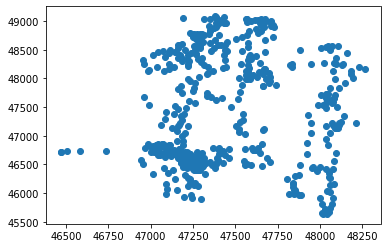

In [134]:
realData = Y_test[:,0]
predictData = Y_pred[:,0]

r_d_s = pd.Series(realData)
p_d_s = pd.Series(predictData)

corr_bitcoin = round(r_d_s.corr(p_d_s),4)

print(corr_bitcoin)

plt.scatter(realData,predictData)
plt.show()